# Two ways to use bathymetric datasets to generate bathymetry contours in a plot

Two types of bathymetric representations are useful with our datasets for visualization:
- shaded bathymetry data (instead of an image or a solid color for water)
- contours at regular or irregular intervals

*Plotting Packages* that make this convenient

- Cartopy and Matplotlib  
- GMT

*Data Sources*
- examples rely on erddap or builtin datasets
- easy to extend to other erddap hosted bathymetry, or netcdf files just by changing source data in the xarray calls

## Cartopy + Matplotlib + erddap/xarray

The following example relys on cartopy+matplotlib

Using Matplotlib (a very common plotting library) and cartopy to create plots.  If you are familiar with matplotlib syntax and arguments, this is a small learning curve.  Plots can be tweaked and the package dependencies are usually pretty stable.

The data is hosted on an erddap server, no special API is needed to download a gridded dataset via opendap protocal

In [1]:
import xarray as xa
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import cmocean #ocean colormaps

extent=[-170, -155, 50, 63]

erddap_grid = xa.open_dataset('https://coastwatch.pfeg.noaa.gov/erddap/griddap/usgsCeSS111')

#given your extent of interst, subset the data to make the contouring quicker... no need to do this globally if you only want the Bering Sea
erddap_grid_sub = erddap_grid.sel(latitude=slice(extent[3],extent[2]),longitude=slice(extent[0],extent[1]))


In [2]:
erddap_grid_sub

<xarray.Dataset>
Dimensions:    (latitude: 1431, longitude: 900)
Coordinates:
  * latitude   (latitude) float32 63.0 62.99 62.98 62.98 ... 50.02 50.01 50.0
  * longitude  (longitude) float32 -170.0 -170.0 -170.0 ... -155.0 -155.0 -155.0
Data variables:
    topo       (latitude, longitude) float32 ...
Attributes: (12/26)
    cdm_data_type:              Grid
    Conventions:                COARDS, CF-1.6, ACDD-1.3
    creator_email:              jjbecker@ucsd.edu, dsandwell@ucsd.edu
    Easternmost_Easting:        179.9917
    geospatial_lat_max:         80.738
    geospatial_lat_min:         -80.738
    ...                         ...
    sourceUrl:                  https://geoport.whoi.edu/thredds/dodsC/bathy/...
    Southernmost_Northing:      -80.738
    standard_name_vocabulary:   CF Standard Name Table v70
    summary:                    Global seafloor topography from satellite alt...
    title:                      Topography, Smith & Sandwell v11.1, 1/60-degree
    Westernmost_Easting:        -179.9917

In [3]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(12,12),
                           subplot_kw=dict(projection=projection))
    if projection == ccrs.PlateCarree():
        gl = ax.gridlines(draw_labels=True)
        gl.xlabels_top = gl.ylabels_right = False
        gl.xformatter = LONGITUDE_FORMATTER
        gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

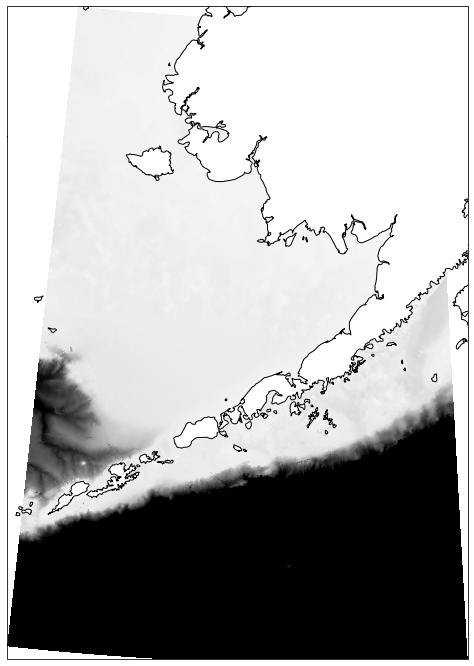

In [9]:
#some basic map projection manipulation and transformation is involved here
# datasets can be large and take time to render so don't go to crazy

with_topo = True

projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()


fig,ax = make_map(projection=projection)

if with_topo:
    ax.pcolormesh(erddap_grid_sub.longitude, erddap_grid_sub.latitude, 
                erddap_grid_sub.topo, cmap=cmocean.cm.gray,
                vmin=-3000,vmax=100,
                transform=transformation)

ax.add_feature(cfeature.NaturalEarthFeature('physical','coastline','10m',edgecolor='k',facecolor='w'))

ax.set_extent(extent)
plt.show()

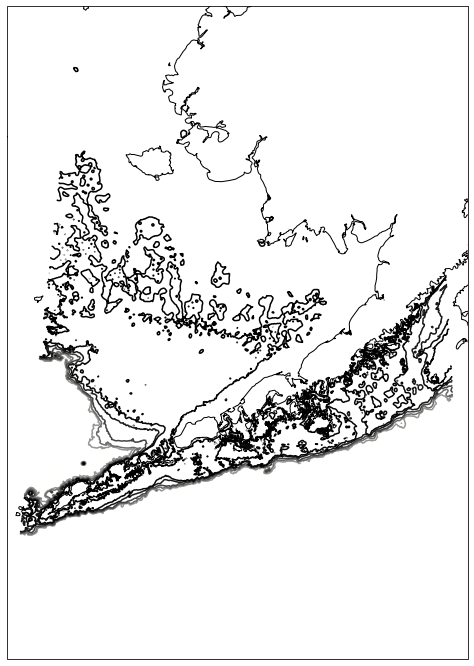

In [23]:
#some basic map projection manipulation and transformation is involved here
# datasets can be large and take time to render so don't go to crazy

with_topo = True

projection=ccrs.LambertConformal(central_longitude=-160.0)
transformation=ccrs.PlateCarree()


fig,ax = make_map(projection=projection)

if with_topo:
    ax.contour(erddap_grid_sub.longitude, erddap_grid_sub.latitude, 
                erddap_grid_sub.topo, cmap=cmocean.cm.gray_r,
                levels=[-1500,-1000,-750,-500,-250,-150,-70],
                transform=transformation)

ax.add_feature(cfeature.NaturalEarthFeature('physical','coastline','10m',edgecolor='k',facecolor='w'))

ax.set_extent(extent)
plt.show()

**Other Tasks that can easily be done**
- contour fill the ocean or change colors
- add labels to contours
- use coarser datasets for smoother contours

## GMT

The following example is using GMT (an actively developed pythonic port of GMT 6) with installation instructions available at [https://www.pygmt.org/latest/](https://www.pygmt.org/latest/).

Personally, there is a lot of strengths to using this well developed package, not limited to the creation of very professional looking plots.- but it can occasionally be hard to install / keep up to date / follow along with examples and sometimes you have to "port" examples or details from pure GMT syntax to pyGMT syntax with little more than the pure GMT references.

I recomend using an environment manager (like whats built in to Conda) to manage pygmt and its dependancies

In [6]:
import pygmt

In [7]:
grid = pygmt.datasets.load_earth_relief(resolution="01m", region=extent) #datasets here can be found in the documentation... many are SRTM derived at high res and will be downloaded to start

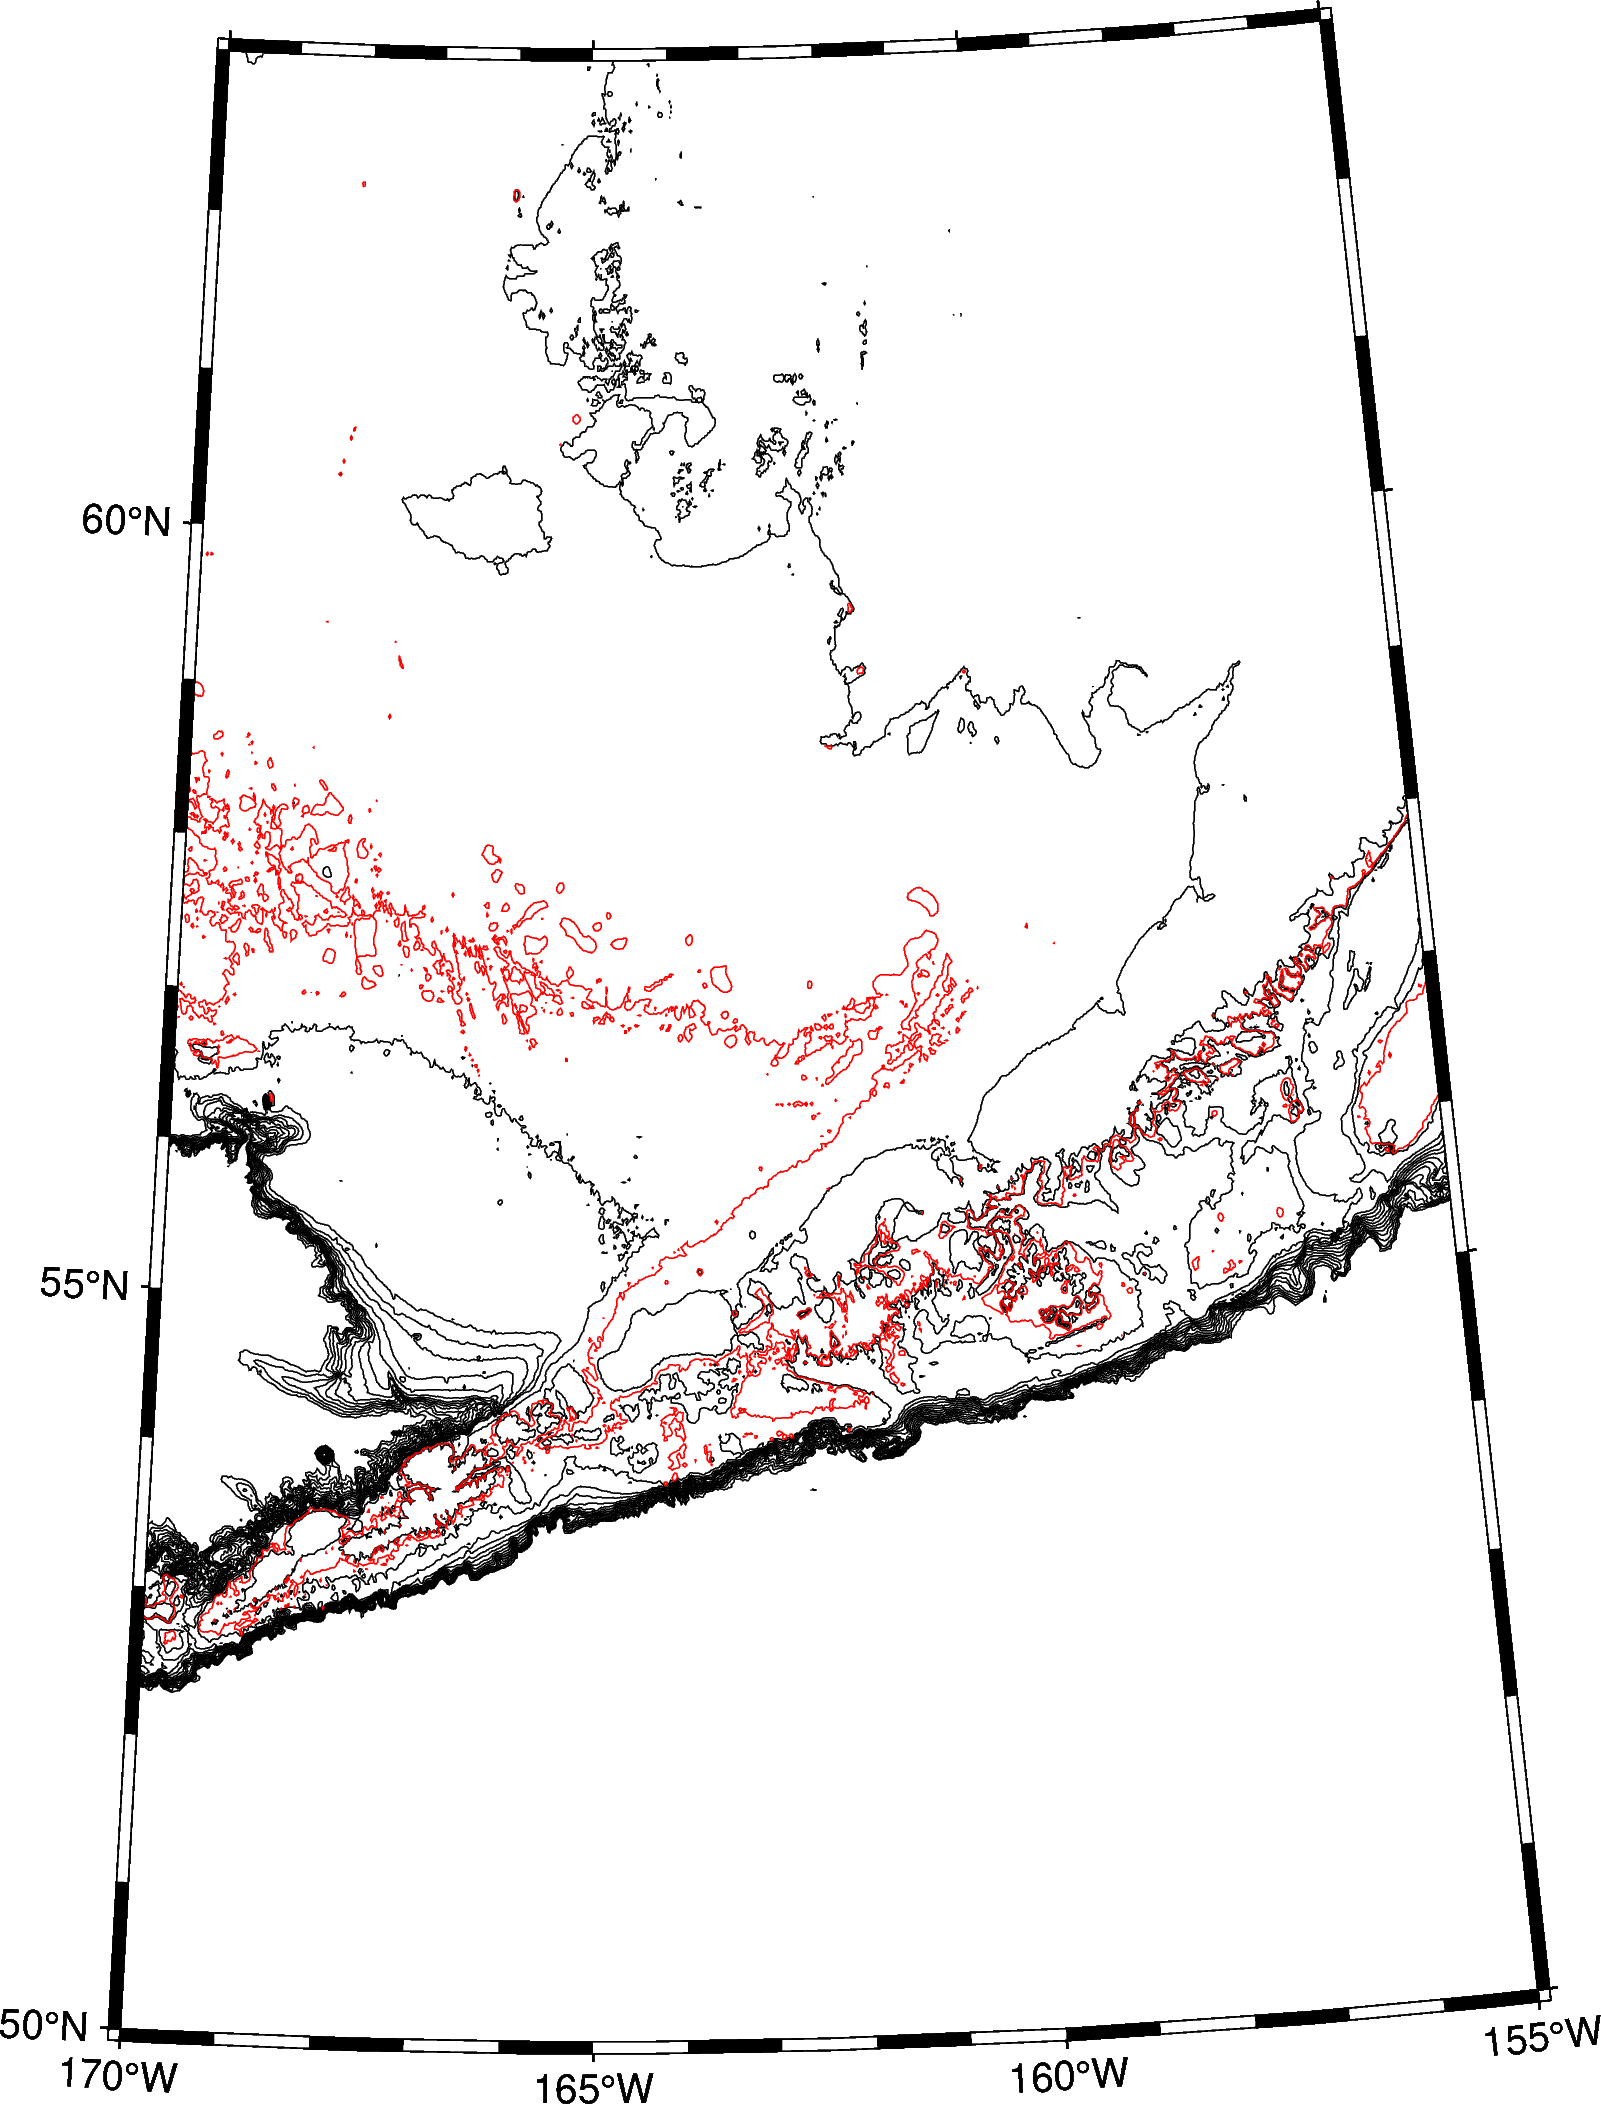

In [8]:
fig = pygmt.Figure()
#fixed interval grids with a secondary color for a isobath of interest
# in this case countour 0,100,200...1500 in black and 70m in red and don't label anything
fig.grdcontour(annotation=None,
               interval=100,
               grid=grid,
               limit=[-1500, 0],
               projection="L-165/35/33/45/12c",
               frame=True,)
fig.grdcontour(annotation=None,
               interval=70,
               grid=grid,
               limit=[-100, -1],
               projection="L-165/35/33/45/12c",
               pen="red",
               frame=True,)
fig.show()

**Other Tasks that can easily be done**
- fill in land or contour fill the ocean
- add labels to contours
- irregular contours
- usage of other gridded datasets including those from netcdf files (not just the builtin datasets)